## Problem Set 1, due January 17th at 11:59pm 


#### Before You Start
For this problem set, you should download the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser. You should also make sure the following libraries load correctly.

In [5]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Your numpy version: 1.20.3 (need at least 1.7.1)
Your SciPy version:  1.7.1 (need at least 0.12.0)
Your Pandas version:  1.3.4 (need at least 0.11.0)
Your Mapltolib version:  3.5.0 (need at least 1.2.1)
Your Scikit-Learn version:  1.0.1 (need at least 0.13.1)


#### Instructions: 
 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 

This data set uses the NYCFlights13 dataset. You can download the dataset from flights data that you downloaded from canvas (flights.zip).

Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
flights_df= pd.read_csv('/Users/ruizhewang/Downloads/flights.csv')

In [11]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [52]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

#### Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [14]:
# Your code here
#filter the flights to seattle
flights_df1 = flights_df[flights_df.dest=='SEA']

#get the number of rows of the df
flights_df1.shape[0]

3923

3923 flights flew from NYC to Seattle in 2013. 

(b) How many airlines fly from JFK to Seattle?

In [188]:
# Your code here
#filter the flights to seattle and from JFK
flights_df2 = flights_df[(flights_df.dest=='SEA')& (flights_df.origin == 'JFK')]

#get the number of carriers
len(flights_df2.carrier.unique())

3

3 airlines flew from JFK to Seattle. 

(c) How many unique air planes fly from JFK to Seattle?

In [19]:
# Your code here
#get the unique number of airplanes fly from JFK to Seattle
len(flights_df2.tailnum.unique())

464

464 unique air planes fly from JFK to Seattle. 

(d) What is the average arrival delay for flights from JFK to Seattle?

In [22]:
# Your code here
#calculate the average arrival delay and skip the NA values
flights_df2.arr_delay.mean(skipna= True)

-1.7566265060240964

The average arrival delay for flights from JFK to Seattle is approximately -1.76 minutes. 

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [51]:
# Your code here

#Approch 1

#get the number of flights from NYC airport to Seattle group by each airport code
#calculate the proportion 
proportion= flights_df1.groupby('origin')['Unnamed: 0'].count()/len(flights_df1)

print(proportion)

#Approch 2

#group the df by origin and use aggregate function to calculate the number of flights within each group
proportion2= flights_df1.groupby('origin').agg(
    {'Unnamed: 0': "count"    
    })
#calculate the proportion
proportion2= proportion2.iloc[:,0]/len(flights_df1)

print(proportion2)

origin
EWR    0.466735
JFK    0.533265
Name: Unnamed: 0, dtype: float64
origin
EWR    0.466735
JFK    0.533265
Name: Unnamed: 0, dtype: float64


Approximately 46.67% of the flights from EWR flew to Seattle and approximately 53.32% of the flights from JFK flew to Seattle. 

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [73]:
# Your code here

#convert the year, month, day columns to a singe date column
flights_df['date']= pd.to_datetime(flights_df[["year", "month", "day"]])

#group the df by date and use agg to calculate the mean for dep_delay and arr_delay within each group
#save the output as delay 
delay= flights_df.groupby('date').agg({
    'dep_delay':'mean',
    'arr_delay':'mean'
})

print(delay.arr_delay.idxmax())
print(delay.dep_delay.idxmax())



2013-03-08 00:00:00
2013-03-08 00:00:00


2013-03-08 has the largest average depature delay and the largest arrival delay. 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights? This one has a few interpretations, just justify what you thought!


In [226]:
# Your code here
#find day with the most number of depature delayed flights

#filter the df to dep_delay above 0
dep_delay_1= flights_df[flights_df['dep_delay']>0]

#group the data by date and count the number
dep_delay_date= dep_delay_1.groupby('date', as_index= False)['Unnamed: 0'].count()

#sort the count value from highest to lowest
dep_delay_date.sort_values(by= ['Unnamed: 0'], ascending= False)

,date,Unnamed: 0
356,2013-12-23,674
66,2013-03-08,653
181,2013-07-01,652
175,2013-06-25,649
203,2013-07-23,645
...,...,...
301,2013-10-29,143
312,2013-11-09,141
291,2013-10-19,135
332,2013-11-29,131


2013-12-23 is the worst day to fly out of NYC in 2013 since it has the highest number of delayed depature flights of 674. 

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [111]:
# Your code here

#create a new column season 
#create a list of conditions
conditions=[
(flights_df['month']==12) | (flights_df['month']==1) |(flights_df['month']==2),
(flights_df['month']>=3) & (flights_df['month']<=5),
(flights_df['month']>=6) & (flights_df['month']<=8),
(flights_df['month']>=9) & (flights_df['month']<=11)
]

#create a list of values we want to assign for each condition
values= ['winter', 'spring', 'summer', 'fall']

#create a new column and use np.select to assign values
flights_df['season']= np.select(conditions, values)

#show the df
flights_df.head()

#calculate the average depature delay for each season
flights_df.groupby('season').agg({
    'dep_delay':'mean'    
})

,dep_delay
season,
fall,6.136711
spring,13.380705
summer,18.334437
winter,12.569983


In 2013, summer has the longest depature delay of approximately 18.33 minutes, while fall has the shortest departure delay of approximately 6.14 minutes. 

(d) On average, how do departure delays vary over the course of a day? Make a graph.

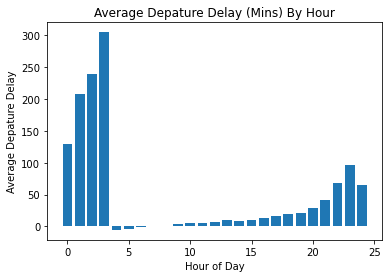

In [112]:
# Your code here
#calculate the average depature delay group by the course of a day
dep_delay_by_hour= flights_df.groupby('hour', as_index= False)['dep_delay'].mean()

#create bar plot
plt.bar(dep_delay_by_hour.hour,dep_delay_by_hour.dep_delay)
plt.title('Average Depature Delay (Mins) By Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Depature Delay')
plt.show()

The bar chart shows that on average 12-4 AM have long departure delay, while 6AM to 9AM on average have no or very short departure delay. 

## Question 3
    Which flight departing NYC in 2013 flew the slowest?

In [113]:
# Your code here

#create new column speed
flights_df['speed']= flights_df['distance']/flights_df['air_time']

#find the index of the minimum speed
index= flights_df['speed'].idxmin()

#use the index to find the flight
flights_df.flight[index]

1860

Flight 1860 flew the slowest, in other words, it has the lowest speed. 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [153]:
# Your code here

#create new column flight_info
flights_df['flights_info']= flights_df['carrier'] + " " + flights_df['flight'].astype(str)+ " " + flights_df['dest']

#get the unique number of dates in the df
unique_number_of_dates= len(flights_df.date.unique())

#create a new df that group by flights info and date
df1= flights_df.groupby(['flights_info', 'date'], as_index= False)['Unnamed: 0'].count()

#rename Unnamed column as count
df1.rename(columns= {'Unnamed: 0':'count'}, inplace= True)

#group df1 by flights info and save as df2
df2= df1.groupby('flights_info', as_index= False).count()

#get the flights info that fly 365 days
flights_365= df2[df2.date== 365]

flights_365[['carrier', 'flight', 'destination']]= flights_365.flights_info.str.split(expand= True)

flights_365

/Users/ruizhewang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,flights_info,date,count,carrier,flight,destination
790,AA 119 LAX,365,365,AA,119,LAX
801,AA 1357 SJU,365,365,AA,1357,SJU
813,AA 1611 MIA,365,365,AA,1611,MIA
842,AA 181 LAX,365,365,AA,181,LAX
941,AA 59 SFO,365,365,AA,59,SFO
1130,B6 1783 MCO,365,365,B6,1783,MCO
1178,B6 219 CLT,365,365,B6,219,CLT
1241,B6 359 BUR,365,365,B6,359,BUR
1246,B6 371 FLL,365,365,B6,371,FLL
1272,B6 431 SRQ,365,365,B6,431,SRQ


The table above shows the flights that fly 365 days a year. The flights are AA 119, AA 1357, AA 1611, AA 181, AA 59, B6 1783, B6 219, B6 359, B6 371, B6 431, B6 703, DL 2159, DL 2391, EV 5712, UA 15, VX 251, VX 407, VX 413. The destinations are LAX, SJU, MIA, SFO, MCO, CLT, BUR, FLL, SRQ, TPA, IAD, HNL, and LAS.  

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


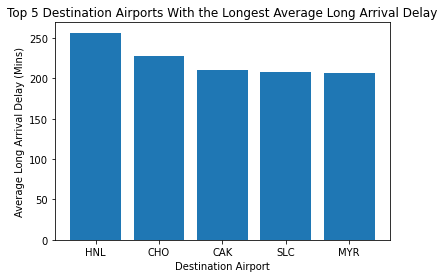

[Text(0.5, 0, 'Destination Airport'),
 Text(0, 0.5, 'Arrival Delay (Mins)'),
 Text(0.5, 1.0, 'Boxplot For Top 5 Destination Airports With the Longest Average Long Arrival Delay')]

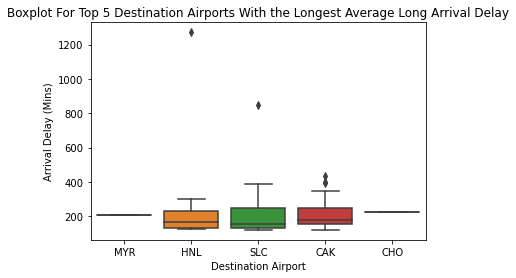

In [187]:
# Your code here

import seaborn as sns

#filter the df with arrival delay above 120 minutes
arr_long_delay= flights_df[flights_df.arr_delay>=120]

#get the average long arrival delay time by each destination airport
#sort by average delay time from largest to smallest
avg_long_delay= arr_long_delay.groupby('dest', as_index= False)['arr_delay'].mean().sort_values('arr_delay', ascending= False)

#rename the column
avg_long_delay.rename(columns= {'arr_delay':'avg_arr_delay'}, inplace= True)

#get the top 5 desination
top5_dest= avg_long_delay[:5]

#create bar chart using top5_dest
plt.bar(top5_dest.dest, top5_dest.avg_arr_delay)
plt.title('Top 5 Destination Airports With the Longest Average Long Arrival Delay')
plt.xlabel('Destination Airport')
plt.ylabel('Average Long Arrival Delay (Mins)')
plt.show()

#get the destination from the top5_dest df
dest_airport= top5_dest.dest

#select rows from arr_long_delay df based on condition
long_delay_top_5= arr_long_delay[arr_long_delay['dest'].isin(dest_airport)]

#create boxplot for long_delay_top_5 df
sns.boxplot(data= long_delay_top_5, 
            x='dest', 
            y='arr_delay'). set(xlabel= 'Destination Airport',
                                ylabel= 'Arrival Delay (Mins)',
                                title= 'Boxplot For Top 5 Destination Airports With the Longest Average Long Arrival Delay'
                               )

I would like to explore the average long delay time for each destination airport. Long delay can be defined as any arrival delay above 120 minutes (2 hours). I used bar chart and boxplot to support my research question. The bar chart shows the top 5 destination airports and its corresponding arrival delay time. We can see that HNL, CHO, CAK, SLC and MYR have the longest long arrival delay. They all have average arrival delay of more than 200 minutes. The boxplot shows the distribution of long arrival delay time for the top 5 airports. From the chart we can see that HNL, SLC, and CAK have outliers and the outliers may skew the mean of arrival delay for those airports. 

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore. Explain your findings.

(8719, 15)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object
   Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0           1    EWR  2013    1.0  1.0   0.0  37.04  21.92  53.97     230.0   
1           2    EWR  2013    1.0  1.0   1.0  37.04  21.92  53.97     230.0   
2           3    EWR  2013    1.0  1.0   2.0  37.94  21.92  52.09     230.0   
3           4    EWR  2013    1.0  1.0   3.0  37.94  23.00  54.51     230.0   
4           5    EWR  2013    1.0  1.0   4.0  37.94  24

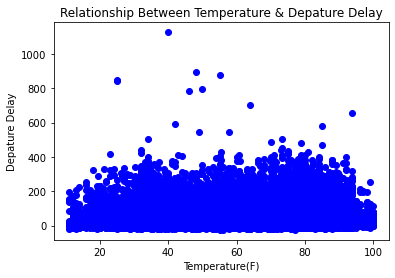

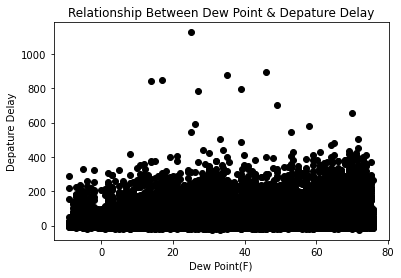

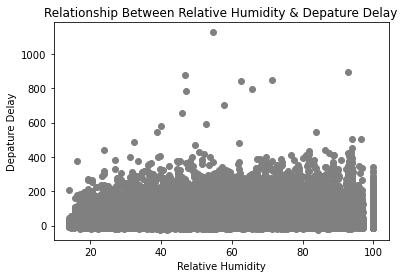

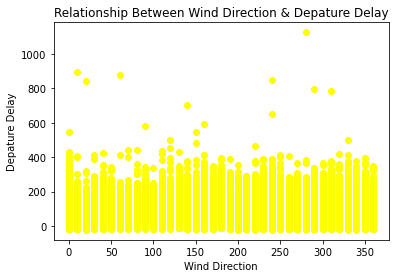

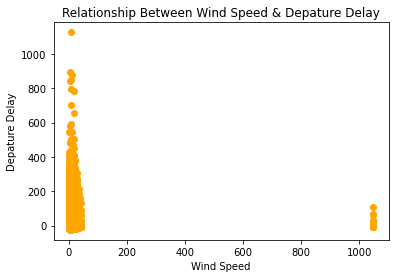

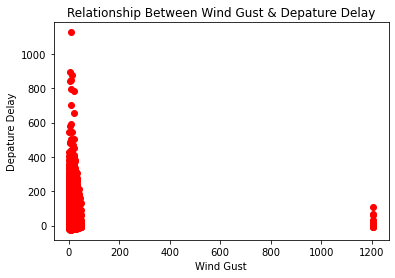

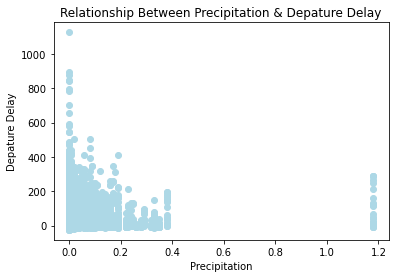

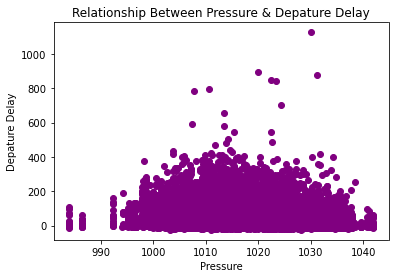

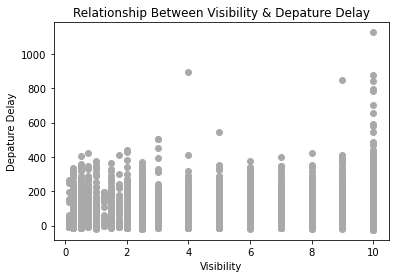

In [218]:
# Your code here
#load the weather dataset
weather= pd.read_csv('/Users/ruizhewang/Downloads/weather.csv')

#inspect the weather df
print (weather.shape)   # rows and columns
print (weather.columns) # column names
print (weather.dtypes)  # data types of each column
print(weather.head()) #first few rows of the df


#join the weather with flights_df by origin, year, month, day and hour
merged= pd.merge(flights_df, weather,
         how= 'inner', on= ['origin', 'year', 'month', 'day', 'hour'])

#check the merged df
merged.head()

#create scatter plot for dep_delay and temp
plt.plot(merged.temp, 
         merged.dep_delay,
         'o',
        color= 'blue')
plt.xlabel('Temperature(F)')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Temperature & Depature Delay')
plt.show()

#create scatter plot for dep_delay and dewp
plt.plot(merged.dewp, 
         merged.dep_delay,
         'o',
        color= 'black')
plt.xlabel('Dew Point(F)')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Dew Point & Depature Delay')
plt.show()

#create scatter plot for dep_delay and humid
plt.plot(merged.humid, 
         merged.dep_delay,
         'o',
        color= 'grey')
plt.xlabel('Relative Humidity')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Relative Humidity & Depature Delay')
plt.show()

#create scatter plot for dep_delay and wind direction
plt.plot(merged.wind_dir, 
         merged.dep_delay,
         'o',
        color= 'yellow')
plt.xlabel('Wind Direction')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Wind Direction & Depature Delay')
plt.show()

#create scatter plot for dep_delay and wind speed
plt.plot(merged.wind_speed, 
         merged.dep_delay,
         'o',
        color= 'orange')
plt.xlabel('Wind Speed')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Wind Speed & Depature Delay')
plt.show()

#create scatter plot for dep_delay and wind gust
plt.plot(merged.wind_gust, 
         merged.dep_delay,
         'o',
        color= 'red')
plt.xlabel('Wind Gust')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Wind Gust & Depature Delay')
plt.show()

#create scatter plot for dep_delay and precipitation
plt.plot(merged.precip, 
         merged.dep_delay,
         'o',
        color= 'lightblue')
plt.xlabel('Precipitation')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Precipitation & Depature Delay')
plt.show()

#create scatter plot for dep_delay and pressure
plt.plot(merged.pressure, 
         merged.dep_delay,
         'o',
        color= 'purple')
plt.xlabel('Pressure')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Pressure & Depature Delay')
plt.show()

#create scatter plot for dep_delay and visibility
plt.plot(merged.visib, 
         merged.dep_delay,
         'o',
        color= 'darkgrey')
plt.xlabel('Visibility')
plt.ylabel('Depature Delay')
plt.title('Relationship Between Visibility & Depature Delay')
plt.show()

I first combine the weather dataset with the flights dataset. I then create scatterplot to explore the relationship between weather conditions and the depature delay. From the graphs, I found that temperature, dew Point, relative humidity and visibility might be correlated with the depature delay. To further answer questions, regression analysis is needed. 